DATA FRAMES 

In [ ]:
import pandas as pd

# Desde un diccionario
data = {"Nombre": ["Ana", "Luis", "Pedro"], "Edad": [23, 34, 29]}
df = pd.DataFrame(data)

# Leer CSV
df = pd.read_csv("archivo.csv")

# Leer Excel
df = pd.read_excel("archivo.xlsx", sheet_name="Hoja1")

# Leer JSON
df = pd.read_json("archivo.json")


JSON

In [1]:
import pandas as pd
import json

# Ejemplo de JSON anidado
json_data = {
    "id": 1,
    "nombre": "Ana",
    "direccion": {"ciudad": "Santiago", "pais": "Chile"},
    "compras": [{"producto": "Libro", "precio": 20}, {"producto": "Lapiz", "precio": 2}]
}

# Normalización
df = pd.json_normalize(json_data)
print(df)

# Si hay listas dentro
df_compras = pd.json_normalize(json_data, "compras", ["id", "nombre"])
print(df_compras)


   id nombre                                            compras  \
0   1    Ana  [{'producto': 'Libro', 'precio': 20}, {'produc...   

  direccion.ciudad direccion.pais  
0         Santiago          Chile  
  producto  precio id nombre
0    Libro      20  1    Ana
1    Lapiz       2  1    Ana


XML 

In [ ]:
# Leer archivo XML directamente
df = pd.read_xml("archivo.xml")

# También desde un string
xml_data = """
<data>
  <persona>
    <nombre>Ana</nombre>
    <edad>23</edad>
  </persona>
  <persona>
    <nombre>Luis</nombre>
    <edad>34</edad>
  </persona>
</data>
"""
df = pd.read_xml(xml_data)
print(df)


ORDEN

In [ ]:
# Ordenar por columna ascendente
df.sort_values("Edad", inplace=True)

# Ordenar descendente
df.sort_values("Edad", ascending=False, inplace=True)

# Filtrar con condiciones
df_filtrado = df[df["Edad"] > 25]

# Seleccionar columnas específicas
df[["Nombre", "Edad"]]

# Información general de los datos
df.info()

# Estadísticas descriptivas
df.describe(include='all')

# Valores nulos por columna
df.isnull().sum()

# Tipos de datos
df.dtypes

# Contar valores únicos de variables categóricas
for col in df.select_dtypes(include='object'):
    print(f"\n🔹 {col}")
    print(df[col].value_counts())


Transformaciones útiles

In [ ]:
# Aplicar funciones a columnas
df["Edad2"] = df["Edad"].apply(lambda x: x * 2)

# Convertir tipos
df["Edad"] = df["Edad"].astype(int)

# Agrupar y resumir
df.groupby("Nombre")["Edad"].mean()

# Pivot tables
pd.pivot_table(df, values="Edad", index="Nombre", aggfunc="mean")


Concatenar DataFrames

In [ ]:
import pandas as pd

df1 = pd.DataFrame({"ID": [1, 2, 3], "Nombre": ["Ana", "Luis", "Pedro"]})
df2 = pd.DataFrame({"ID": [4, 5], "Nombre": ["Clara", "Sofía"]})

# Concatenar filas (uno debajo del otro)
df_concat = pd.concat([df1, df2], ignore_index=True)

# Concatenar columnas (lado a lado)
df_col = pd.concat([df1, df2], axis=1)

# Merge (similar a SQL JOIN)
df_a = pd.DataFrame({"ID": [1, 2], "Edad": [23, 34]})
df_b = pd.DataFrame({"ID": [1, 2], "Ciudad": ["Santiago", "Valparaíso"]})

df_merge = pd.merge(df_a, df_b, on="ID", how="inner")  # tipos: inner, left, right, outer


Tipos de datos en un DataFrame

In [ ]:
import numpy as np

df = pd.DataFrame({
    "entero": [1, 2, 3],
    "decimal": [1.1, 2.2, 3.3],
    "texto": ["a", "b", "c"],
    "logico": [True, False, True],
    "categoria": pd.Categorical(["A", "B", "A"]),
    "fecha": pd.to_datetime(["2025-01-01", "2025-01-02", "2025-01-03"]),
    "tiempo": pd.to_timedelta([1, 2, 3], unit="d")
})
print(df.dtypes)


datetime

In [ ]:
# Convertir texto a datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# Extraer componentes
df["año"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month
df["dia"] = df["fecha"].dt.day
df["dia_semana"] = df["fecha"].dt.day_name()

# Diferencia de fechas
df["diff_dias"] = df["fecha"].diff().dt.days


COERCE

In [ ]:
df = pd.DataFrame({"valores": ["10", "20", "hola", "30"]})

# Convertir a numérico, errores → NaN
df["valores_num"] = pd.to_numeric(df["valores"], errors="coerce")


df = pd.DataFrame({"fechas": ["2025-01-01", "2025-02-15", "no_valida", "2025-03-10"]})

# Convertir a datetime, errores → NaT
df["fechas_dt"] = pd.to_datetime(df["fechas"], errors="coerce")


Exploración rápida del DataFrame

In [ ]:
df.head()       # Primeras 5 filas
df.tail(10)     # Últimas 10 filas
df.info()       # Tipos de datos + valores nulos
df.describe()   # Estadísticas descriptivas (media, std, min, max, etc.)
df.shape        # Dimensiones (filas, columnas)
df.columns      # Nombre de columnas
df.index        # Índices actuales


Reemplazar valores

In [ ]:
# Reemplazar un valor específico
df["columna"] = df["columna"].replace("?", None)

# Reemplazar múltiples valores
df["columna"] = df["columna"].replace({"SI": True, "NO": False})


Crear columnas condicionales

In [ ]:
# Ejemplo: marcar mayores de edad
df["mayor_edad"] = df["Edad"].apply(lambda x: "Sí" if x >= 18 else "No")

# O con np.where (más rápido)
import numpy as np
df["mayor_edad"] = np.where(df["Edad"] >= 18, "Sí", "No")


Resúmenes y conteos

In [ ]:
# Contar valores únicos
df["columna"].value_counts()

# Número de valores únicos
df["columna"].nunique()

# Conteo rápido de NaN por columna
df.isna().sum()


Multi-índices y agrupación avanzada

In [ ]:
# Agrupar por varias columnas
df.groupby(["Ciudad", "Genero"])["Edad"].mean()

# Generar múltiples estadísticas a la vez
df.groupby("Ciudad")["Edad"].agg(["mean", "min", "max", "count"])


Reordenar columnas

In [ ]:
# Ordenar columnas por nombre
df = df[sorted(df.columns)]

# O reordenar manualmente
df = df[["Nombre", "Edad", "Ciudad"]]


Aplicar funciones fila por fila

In [ ]:
# Sumar dos columnas
df["suma"] = df["col1"] + df["col2"]

# Usar apply fila a fila
df["etiqueta"] = df.apply(lambda row: f"{row['Nombre']}-{row['Ciudad']}", axis=1)


drop

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "ID": [1, 2, 3],
    "Nombre": ["Ana", "Luis", "Pedro"],
    "Edad": [23, 34, 29]
})

# 🔹 Eliminar columnas
df_sin_col = df.drop(columns=["Edad"])

# 🔹 Eliminar filas por índice
df_sin_fila = df.drop(index=[0])   # elimina fila con índice 0

# 🔹 Eliminar varias filas y columnas a la vez
df_sin = df.drop(index=[0, 2], columns=["Edad"])

# 🔹 inplace=True modifica el DataFrame original
df.drop(columns=["Edad"], inplace=True)


BeautifulSoup

In [1]:
from bs4 import BeautifulSoup
import pandas as pd

html = """
<table>
  <tr><th>Nombre</th><th>Edad</th></tr>
  <tr><td>Ana</td><td>23</td></tr>
  <tr><td>Luis</td><td>34</td></tr>
  <tr><td>Pedro</td><td>29</td></tr>
</table>
"""

# Parsear HTML con BeautifulSoup
soup = BeautifulSoup(html, "html.parser")

# Extraer tablas con pandas directamente
dfs = pd.read_html(str(soup))  # devuelve lista de DataFrames
df = dfs[0]  # primer DataFrame
print(df)
# Cargar un HTML desde archivo
with open("pagina.html", "r", encoding="utf-8") as f:
    soup = BeautifulSoup(f, "html.parser")

# Encontrar todas las tablas
tablas = soup.find_all("table")

# Extraer primera tabla como DataFrame
df = pd.read_html(str(tablas[0]))[0]

# Extraer texto de etiquetas
links = [a["href"] for a in soup.find_all("a", href=True)]


C:\Users\Felipe\AppData\Local\Temp\ipykernel_24892\2531093164.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(soup))  # devuelve lista de DataFrames


ImportError: Missing optional dependency 'lxml'.  Use pip or conda to install lxml.

Lectura desde APIs / Web

In [ ]:
import requests

url = "https://jsonplaceholder.typicode.com/users"
data = requests.get(url).json()

df = pd.json_normalize(data)


Manejo de texto

In [ ]:
# Longitud de cadenas
df["longitud"] = df["texto"].str.len()

# Buscar patrones
df["contiene_python"] = df["texto"].str.contains("Python", case=False)

# Reemplazar texto
df["texto"] = df["texto"].str.replace(r"\d+", "", regex=True)


Matplotlib/geopandas

In [ ]:
# ========================================
# 📊 Matplotlib + Pandas + GeoPandas resumen
# ========================================

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# ----------------------------------------
# 1. Lo básico de matplotlib
# ----------------------------------------
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y, label="Línea")
plt.title("Ejemplo básico")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.show()
"""plt.plot() → línea

plt.bar() → barras

plt.hist() → histogramas

plt.scatter() → dispersión

plt.boxplot() → caja y bigotes"""
# ----------------------------------------
# 2. Usar pandas con matplotlib
# ----------------------------------------
df = pd.DataFrame({
    "Mes": ["Ene", "Feb", "Mar", "Abr"],
    "Ventas": [100, 120, 90, 150]
})

# Línea
df.plot(x="Mes", y="Ventas", kind="line", marker="o")

# Barras
df.plot(x="Mes", y="Ventas", kind="bar")

# Histograma
df["Ventas"].plot(kind="hist", bins=5)
plt.show()

# ----------------------------------------
# 3. Subplots (varios gráficos juntos)
# ----------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df.plot(x="Mes", y="Ventas", kind="bar", ax=axes[0], title="Barras")
df["Ventas"].plot(kind="hist", bins=5, ax=axes[1], title="Histograma")
plt.tight_layout()
plt.show()

# ----------------------------------------
# 4. Usar GeoPandas para mapas
# ----------------------------------------
gdf = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Graficar el mundo
gdf.plot()
plt.show()

# Mapamundi coloreado por población
gdf.plot(column="pop_est", cmap="OrRd", legend=True, figsize=(12,6))
plt.title("Población estimada por país")
plt.show()

# Filtrar Sudamérica
sudamerica = gdf[gdf["continent"] == "South America"]

# Dibujar Sudamérica
base = sudamerica.plot(color="lightgray", edgecolor="black")

# Agregar puntos de ejemplo
ciudades = gpd.GeoDataFrame({
    "ciudad": ["Santiago", "Buenos Aires"],
    "geometry": gpd.points_from_xy([-70.66, -58.38], [-33.45, -34.6])
})
ciudades.plot(ax=base, color="red", markersize=50)
plt.show()

# ----------------------------------------
# 5. Personalización rápida
# ----------------------------------------
df.plot(kind="line", style="o--", color="purple", figsize=(8,4))
plt.grid(True)
plt.xticks(rotation=45)
plt.title("Ventas mensuales", fontsize=14)
plt.show()


Visualización de distribuciones


c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


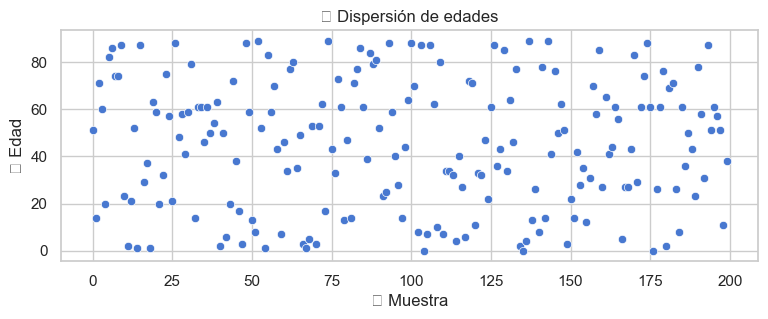

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


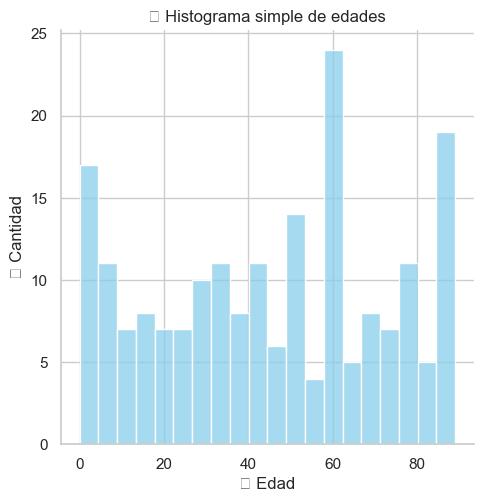

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


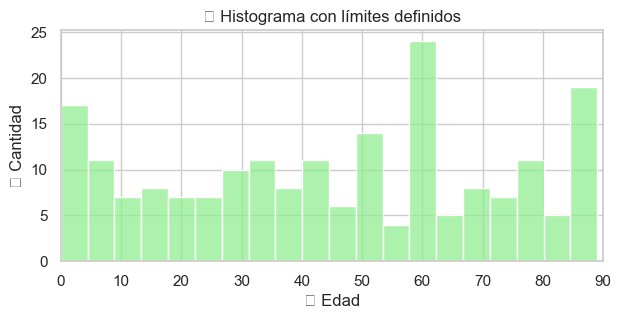

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


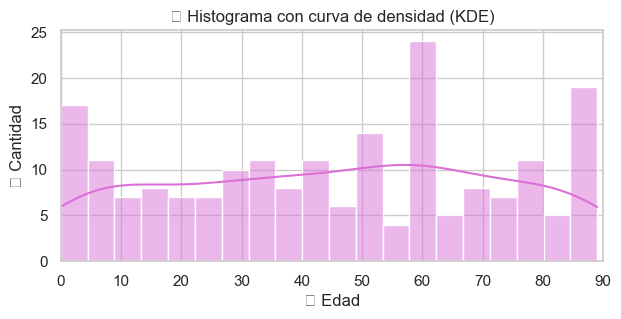

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


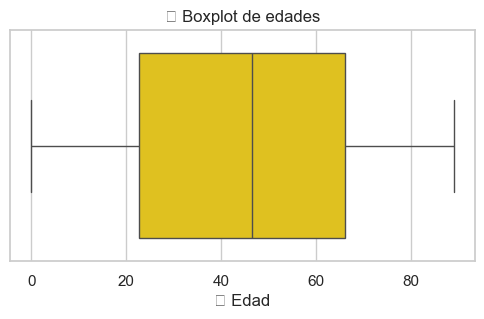

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


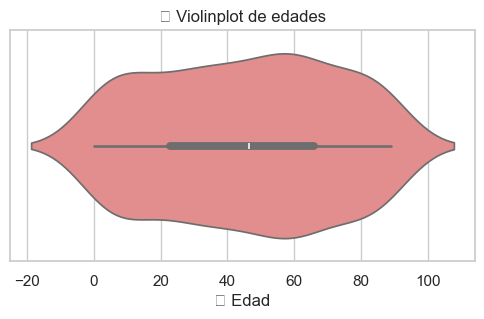

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


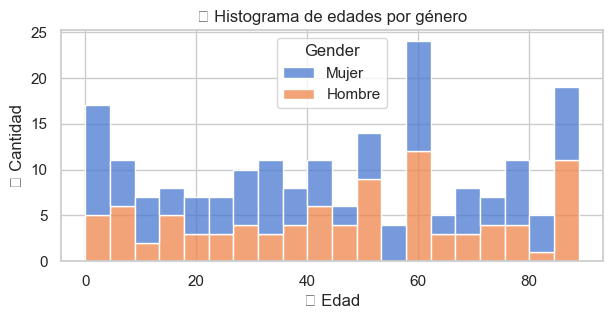

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


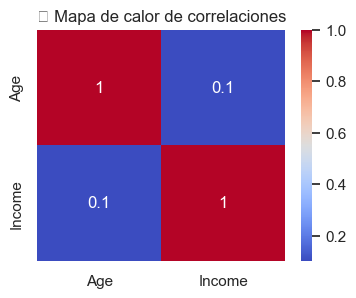

In [2]:
# 📚 Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Configurar estilo visual de los gráficos
sns.set(style="whitegrid", palette="muted")

# 🧠 (Ejemplo) Crear o cargar datos
# Si ya tienes un DataFrame llamado "data", elimina esta parte.
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(0, 90, 200),
    'Gender': np.random.choice(['Hombre', 'Mujer'], 200)
})

# ===========================================================
# 🎯 1️⃣ GRÁFICO DE DISPERSIÓN (scatterplot)
# ===========================================================
fig, ax = plt.subplots(1, 1, figsize=(9,3))
sns.scatterplot(x=range(len(data)), y=data['Age'], ax=ax)
plt.xlabel('🧍 Muestra')
plt.ylabel('🎂 Edad')
plt.title('🔹 Dispersión de edades')
plt.show()

# ===========================================================
# 📦 2️⃣ HISTOGRAMA SIMPLE (sin KDE)
# ===========================================================
sns.displot(data['Age'], kde=False, bins=20, color='skyblue')
plt.xlabel('🎂 Edad')
plt.ylabel('📊 Cantidad')
plt.title('🔹 Histograma simple de edades')
plt.show()

# ===========================================================
# 📦 3️⃣ HISTOGRAMA CONTROLADO (con límites en el eje x)
# ===========================================================
fig, ax = plt.subplots(1, 1, figsize=(7,3))
sns.histplot(data=data, x='Age', bins=20, color='lightgreen', ax=ax)
ax.set_xlabel('🎂 Edad')
ax.set_ylabel('📊 Cantidad')
ax.set(xlim=(0, 90))
ax.set_title('🔹 Histograma con límites definidos')
plt.show()

# ===========================================================
# 📈 4️⃣ HISTOGRAMA CON KDE (curva de densidad)
# ===========================================================
fig, ax = plt.subplots(1, 1, figsize=(7,3))
sns.histplot(data=data, x='Age', bins=20, kde=True, color='orchid', ax=ax)
ax.set_xlabel('🎂 Edad')
ax.set_ylabel('📊 Cantidad')
ax.set(xlim=(0, 90))
ax.set_title('🔹 Histograma con curva de densidad (KDE)')
plt.show()

# ===========================================================
# 📊 5️⃣ BOXPLOT (para detectar outliers y mediana)
# ===========================================================
fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.boxplot(data=data, x='Age', color='gold', ax=ax)
ax.set_xlabel('🎂 Edad')
ax.set_title('🔹 Boxplot de edades')
plt.show()

# ===========================================================
# 🎻 6️⃣ VIOLINPLOT (densidad + distribución)
# ===========================================================
fig, ax = plt.subplots(1, 1, figsize=(6,3))
sns.violinplot(data=data, x='Age', color='lightcoral', ax=ax)
ax.set_xlabel('🎂 Edad')
ax.set_title('🔹 Violinplot de edades')
plt.show()

# ===========================================================
# 💡 7️⃣ OPCIONAL: COMPARACIÓN POR CATEGORÍA (Ej: Género)
# ===========================================================
fig, ax = plt.subplots(1, 1, figsize=(7,3))
sns.histplot(data=data, x='Age', hue='Gender', multiple='stack', bins=20, ax=ax)
ax.set_xlabel('🎂 Edad')
ax.set_ylabel('📊 Cantidad')
ax.set_title('🔹 Histograma de edades por género')
plt.show()

# ===========================================================
# 🔥 8️⃣ HEATMAP DE CORRELACIONES (si hay más variables numéricas)
# ===========================================================
# Ejemplo: añadir una variable extra
data['Income'] = np.random.randint(300, 1500, 200)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', ax=ax)
ax.set_title('🔹 Mapa de calor de correlaciones')
plt.show()



📊 Estadísticas descriptivas del DataFrame:
count    200.000000
mean     101.418210
std       20.479719
min       48.940204
25%       85.883667
50%      101.083304
75%      116.154367
max      147.662895
Name: Valores, dtype: float64 



c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


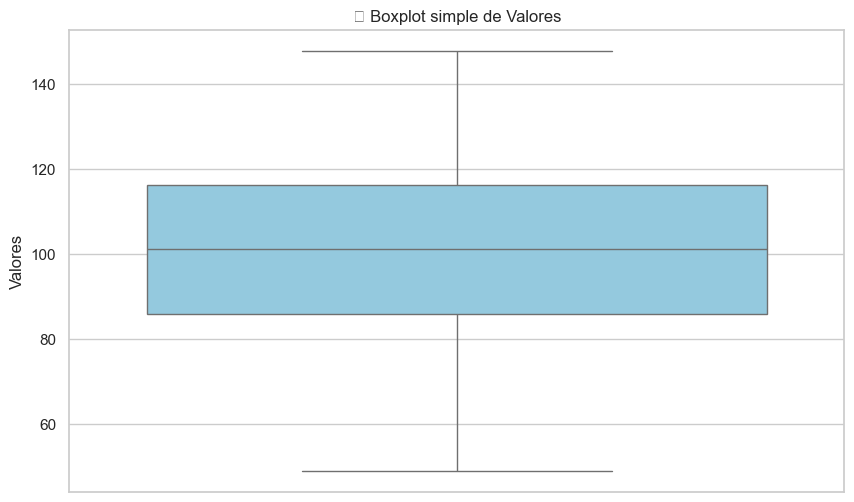

C:\Users\Felipe\AppData\Local\Temp\ipykernel_35624\3851982903.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dfe, x='Category2', y='Valores', ax=ax, palette='Set2')
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


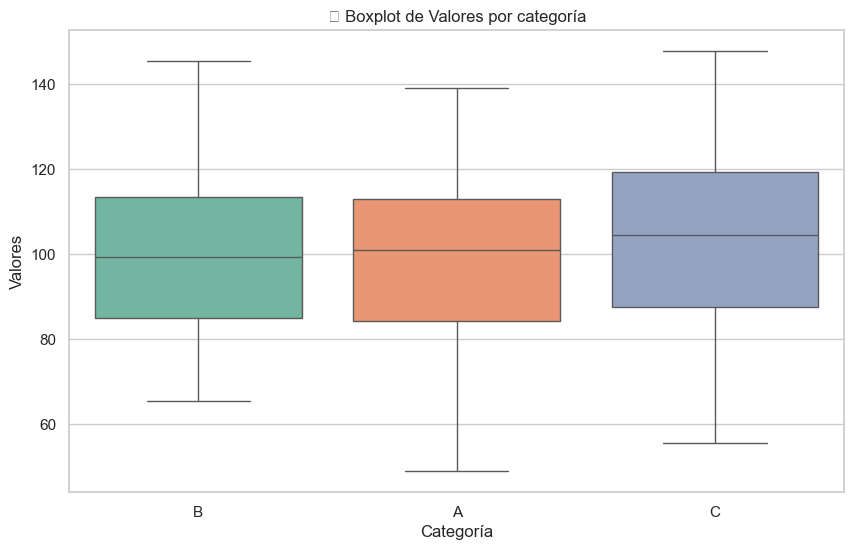

C:\Users\Felipe\AppData\Local\Temp\ipykernel_35624\3851982903.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfe, x='Category2', y='Valores', ax=ax, gridsize=20, palette='pastel')
c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


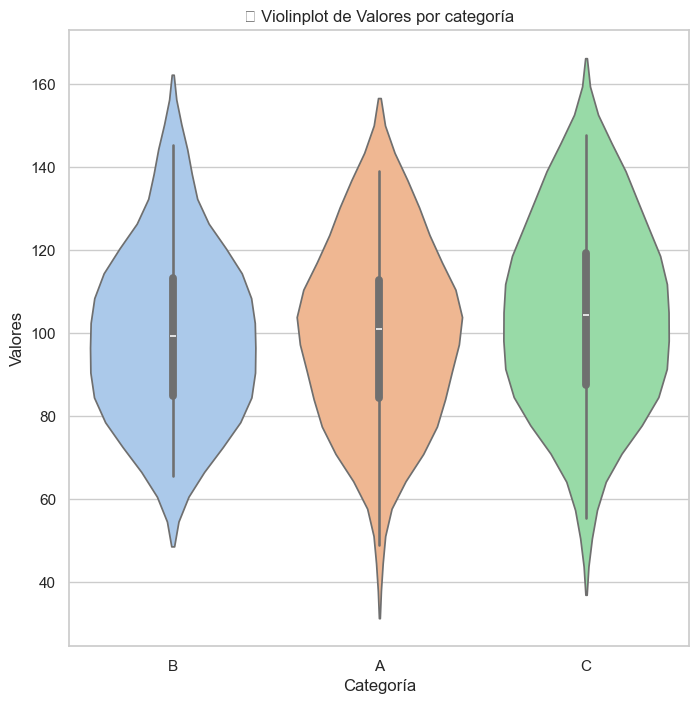

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


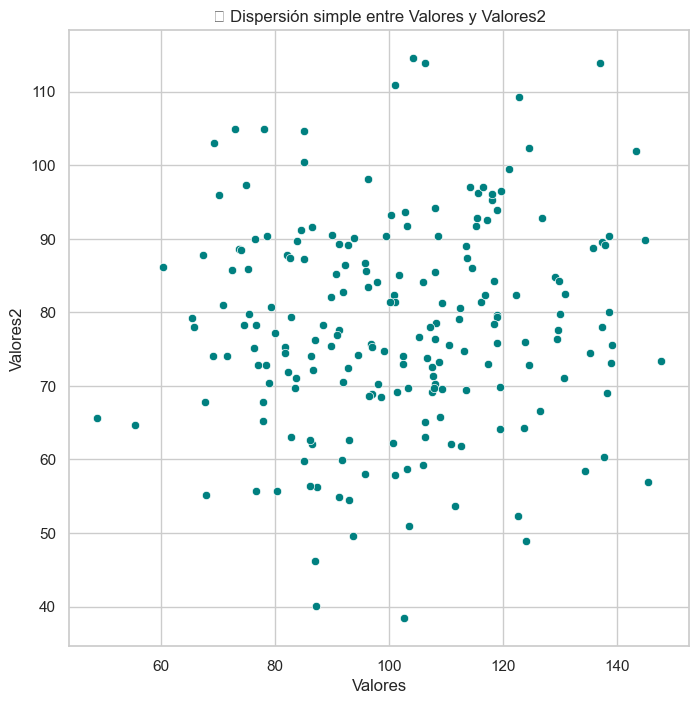

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


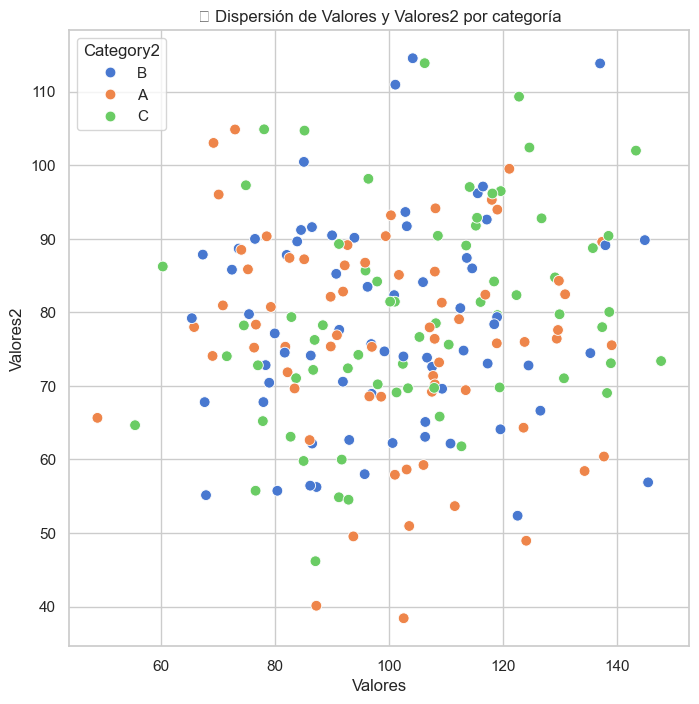

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


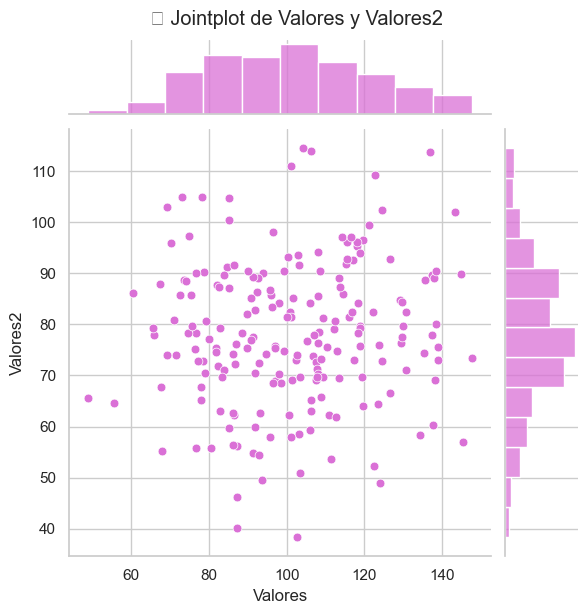

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


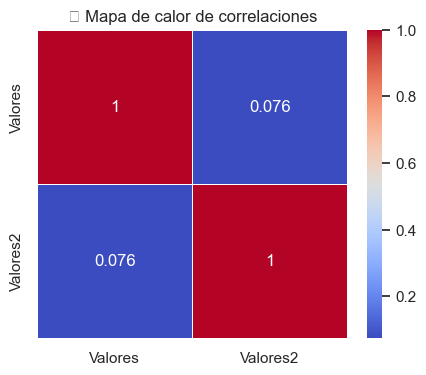

c:\Users\Felipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


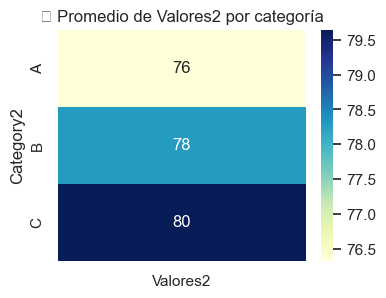

✅ Gráficos generados correctamente.


In [1]:
# 📚 Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 Configurar el estilo visual
sns.set(style="whitegrid", palette="muted")

# 🧠 (Ejemplo) Crear o cargar un DataFrame dfe
# Si ya tienes tu DataFrame, elimina este bloque.
np.random.seed(0)
dfe = pd.DataFrame({
    'Valores': np.random.normal(100, 20, 200),
    'Valores2': np.random.normal(80, 15, 200),
    'Category2': np.random.choice(['A', 'B', 'C'], 200)
})

# ===========================================================
# 📋 1️⃣ ANÁLISIS DESCRIPTIVO DE LOS VALORES
# ===========================================================
print("📊 Estadísticas descriptivas del DataFrame:")
print(dfe['Valores'].describe(), "\n")

# ===========================================================
# 📦 2️⃣ BOXPLOT SIMPLE — Distribución de 'Valores'
# ===========================================================
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.boxplot(data=dfe, y='Valores', ax=ax, color='skyblue')
ax.set_title('🔹 Boxplot simple de Valores')
ax.set_ylabel('Valores')
plt.show()

# ===========================================================
# 📦 3️⃣ BOXPLOT POR CATEGORÍA — Comparación entre grupos
# ===========================================================
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
sns.boxplot(data=dfe, x='Category2', y='Valores', ax=ax, palette='Set2')
ax.set_title('🔹 Boxplot de Valores por categoría')
ax.set_xlabel('Categoría')
ax.set_ylabel('Valores')
plt.show()

# ===========================================================
# 🎻 4️⃣ VIOLINPLOT — Densidad y distribución por categoría
# ===========================================================
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.violinplot(data=dfe, x='Category2', y='Valores', ax=ax, gridsize=20, palette='pastel')
ax.set_title('🔹 Violinplot de Valores por categoría')
ax.set_xlabel('Categoría')
ax.set_ylabel('Valores')
plt.show()

# ===========================================================
# 💠 5️⃣ SCATTER PLOT — Relación entre dos variables
# ===========================================================
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.scatterplot(data=dfe, x='Valores', y='Valores2', ax=ax, color='teal')
ax.set_title('🔹 Dispersión simple entre Valores y Valores2')
ax.set_xlabel('Valores')
ax.set_ylabel('Valores2')
plt.show()

# ===========================================================
# 💠 6️⃣ SCATTER PLOT POR CATEGORÍA — Coloreado por grupo
# ===========================================================
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
sns.scatterplot(data=dfe, x='Valores', y='Valores2', hue='Category2', ax=ax, s=60)
ax.set_title('🔹 Dispersión de Valores y Valores2 por categoría')
ax.set_xlabel('Valores')
ax.set_ylabel('Valores2')
plt.show()

# ===========================================================
# 💬 7️⃣ JOINTPLOT — Relación conjunta con histogramas marginales
# ===========================================================
sns.jointplot(data=dfe, x='Valores', y='Valores2', s=40, kind='scatter', edgecolor='w', color='orchid')
plt.suptitle('🔹 Jointplot de Valores y Valores2', y=1.02)
plt.show()

# ===========================================================
# 🔥 8️⃣ HEATMAP — Mapa de calor de correlaciones numéricas
# ===========================================================
# Calculamos correlaciones solo de columnas numéricas
corr = dfe.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax)
ax.set_title('🔹 Mapa de calor de correlaciones')
plt.show()

# ===========================================================
# 💎 9️⃣ HEATMAP POR CATEGORÍA (Pivot Table)
# ===========================================================
# Promedio de Valores2 por categoría
pivot = dfe.pivot_table(values='Valores2', index='Category2', aggfunc='mean')

fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', ax=ax)
ax.set_title('🔹 Promedio de Valores2 por categoría')
plt.show()

# ===========================================================
# ✅ FIN DEL SCRIPT
# ===========================================================
print("✅ Gráficos generados correctamente.")
